<a href="https://colab.research.google.com/github/plaban1981/Transformers-Tutorials/blob/master/Natural_Language_Processing_using_Transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Transformers
To understand what is novel about transformers, we need to understand
 * The encoder-decoder framework
 * Attention mechanisms
 * Transfer learning

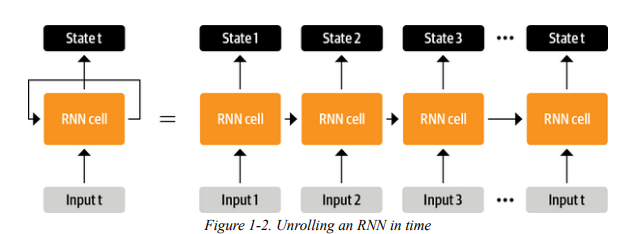

* The RNN passes information about its state at each step to the next operation in the sequence. 

* This allows an RNN to keep track of information from previous steps, and use it for its output predictions.

* RNNs played an important role was in the development of machine translation systems, where the objective is to map a sequence of words in one language to another. 
* This kind of task  was  tackled with
an encoder-decoder or sequence-to-sequence architecture

## Encoder Decoder Architecture
 
* The job of the encoder is to encode the information from the input sequence into a numerical representation that is often called the last hidden state. 

* This state is then passed to the decoder, which generates the output sequence.
* In general, the encoder and decoder components can be any kind of neural network architecture that can model sequences.

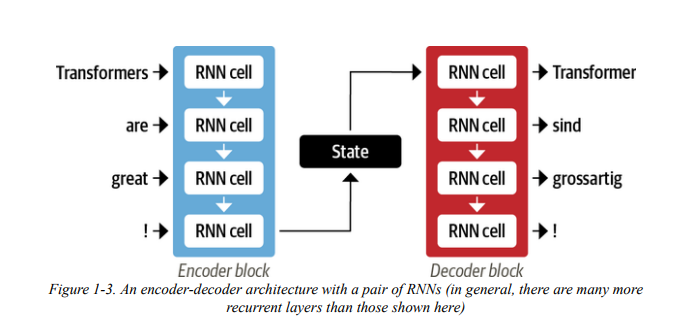

* one weakness of the encoder decoder  architecture is that the final hidden state of the encoder creates an information bottleneck

* The final hidden state has to represent the meaning of the whole input sequence because this is all
the decoder has access to when generating the output. 

* This is challenging for long sequences, where information at the start of the sequence might be lost in the process of compressing everything to a single,
fixed representation

* The mechanism to overcome the bottlencek is called **attention mechanism**

## Attention Mechanisms

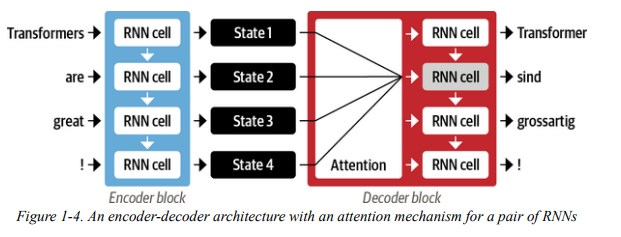

* The main **idea** behind attention is that **instead of producing a single hidden state for the input sequence, the encoder outputs a hidden state at each step
that the decoder can access**. 

* However, using all the states at the same time
would create a huge input for the decoder, so some mechanism is needed to prioritize which states to use.

* This is where **attention** comes in: it **lets the
decoder assign a different amount of weight, or “attention,” to each of the 6 encoder states at every decoding timestep**

* By focusing on which **input tokens are most relevant at each timestep**, these **attention-based models are able to learn nontrivial alignments between the
words** in a generated translation and those in a source sentence.

* Although **attention enabled the production of much better translations** , there
was still a major shortcoming with using recurrent models for the encoder and decoder: 
    - the computations are inherently sequential and cannot be parallelized across the input sequence.

* the **Transformer**, a new modeling paradigm was introduced: which relied on a special form of
attention called **self-attention.**

* both the encoder and the decoder have their own self-attention mechanisms, whose outputs are fed to feed-forward neural networks (FF NNs). 

* This architecture can be trained much faster than recurrent model

* Both the encoder and the decoder have their own self-attention mechanisms, whose outputs are fed to feed-forward neural networks (FF NNs).

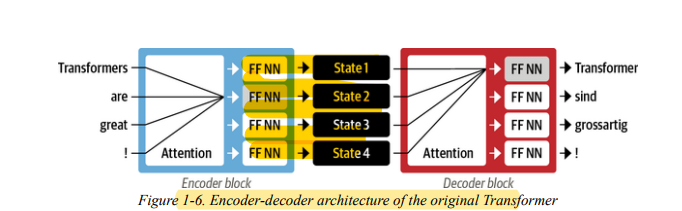

## Transfer Learning in NLP

* Architecturally, this
involves splitting the model into of a **body** and **a head**, where the head is a
task-specific network.

* During training, the weights of the body learn broad
features of the source domain, and these weights are used to initialize a new
model for the new task

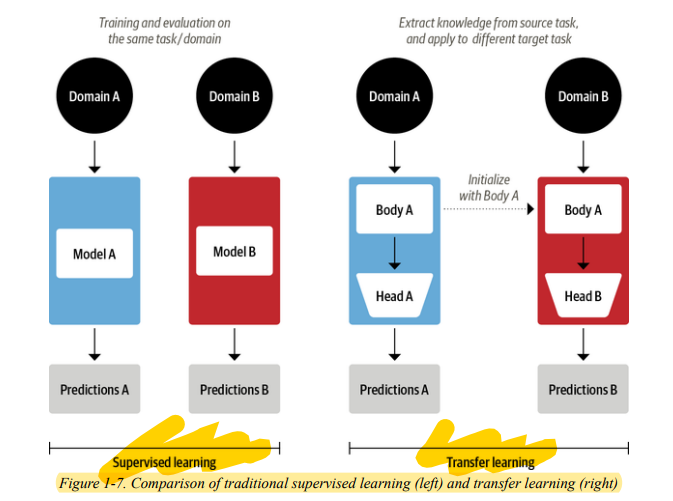

#### The two transformers  that combined self-attention with transfer learning:

* GPT Uses only the decoder part of the Transformer architecture, and the same language modeling approach as ULMFiT. 
* GPT was pretrained on the BookCorpus, which consists of 7,000 unpublished books from a variety of genres including Adventure, Fantasy, and Romance.

* BERT Uses the encoder part of the Transformer architecture, and a special
form of language modeling called masked language modeling. 
* The objective of masked language modeling is to predict randomly masked words in a text. 

  - For example, given a sentence like 
  “I looked at my [MASK] and saw that [MASK] was late ”  - the model needs to predict the
most likely candidates for the masked words that are denoted by
[MASK]. 
* BERT was pretrained on the BookCorpus and English
Wikipedia

## Hugging Face Transformers
usually involves the following steps:
1. Implement the model architecture in code, typically based on PyTorch or TensorFlow.
2. Load the pretrained weights (if available) from a server.
3. Preprocess the inputs, pass them through the model, and apply
some task-specific postprocessing.
4. Implement dataloaders and define loss functions and optimizers to
train the mode

* Transformers provides a standardized interface to a wide range of transformer models as
well as code and tools to adapt these models to new use cases

* Transformers has a layered API that
allows you to interact with the library at various levels of abstraction

In [1]:
text = """Dear Amazon, last week I ordered an Optimus Prime action figure
from your online store in Germany. Unfortunately, when I opened the package,
I discovered to my horror that I had been sent an action figure of Megatron
instead! As a lifelong enemy of the Decepticons, I hope you can understand my
dilemma. To resolve the issue, I demand an exchange of Megatron for the
Optimus Prime figure I ordered. Enclosed are copies of my records concerning
this purchase. I expect to hear from you soon. Sincerely, Bumblebee."""


In [3]:
!pip install --quiet transformers

     |████████████████████████████████| 4.4 MB 5.4 MB/s 
     |████████████████████████████████| 596 kB 54.1 MB/s 
     |████████████████████████████████| 101 kB 9.5 MB/s 
     |████████████████████████████████| 6.6 MB 38.3 MB/s 


In [2]:
from transformers import pipeline
# Instantiate a pipeline by calling the pipeline()
classifier = pipeline("text-classification")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


* The first time you run this code you’ll see a few progress bars appear
because the pipeline automatically downloads the model weights from the
Hugging Face Hub. 
* The second time you instantiate the pipeline, the library
will notice that you’ve already downloaded the weights and will use the
cached version instead

* By default, the text-classification pipeline
uses a model that’s designed for sentiment analysis, but it also supports
multiclass and multilabel classification.

In [5]:
import pandas as pd
output = classifier(text)
pd.DataFrame(output)

,label,score
0,NEGATIVE,0.901546


*  **Note** that for sentiment analysis tasks the pipeline
only returns one of the POSITIVE or NEGATIVE labels, since the other can be
inferred by computing **1-score**.

## Named Entity Recognition

* real-world objects like products, places, and people are called named
entities, and extracting them from text is called named entity recognition
(NER).

In [6]:
ner_tagger = pipeline("ner", aggregation_strategy="simple")
outputs = ner_tagger(text)
pd.DataFrame(outputs)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english)


Downloading:   0%|          | 0.00/998 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.24G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

,entity_group,score,word,start,end
0,ORG,0.879010,Amazon,5,11
1,MISC,0.990859,Optimus Prime,36,49
2,LOC,0.999755,Germany,90,97
3,MISC,0.556570,Mega,208,212
4,PER,0.590256,##tron,212,216
5,ORG,0.669692,Decept,253,259
6,MISC,0.498349,##icons,259,264
7,MISC,0.775362,Megatron,350,358
8,MISC,0.987854,Optimus Prime,367,380
9,PER,0.812096,Bumblebee,502,511


## Question Answering
* In question answering, we provide the model with a passage of text called
the context, along with a question whose answer we’d like to extract. 
* The
model then returns the span of text corresponding to the answer. 

In [7]:
reader = pipeline("question-answering")
question = "What does the customer want?"
outputs = reader(question=question, context=text)
pd.DataFrame([outputs])

No model was supplied, defaulted to distilbert-base-cased-distilled-squad (https://huggingface.co/distilbert-base-cased-distilled-squad)


Downloading:   0%|          | 0.00/473 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/249M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

,score,start,end,answer
0,0.631292,335,358,an exchange of Megatron


*  the pipeline also returned start and
end integers that correspond to the character indices where the answer span
was found (just like with NER tagging).

In [12]:
summarizer = pipeline("summarization")
outputs = summarizer(text, max_length=100, clean_up_tokenization_spaces=True)
print(outputs[0]['summary_text'])

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 (https://huggingface.co/sshleifer/distilbart-cnn-12-6)


 Bumblebee ordered an Optimus Prime action figure from your online store in Germany. Unfortunately, when I opened the package, I discovered to my horror that I had been sent an action figure of Megatron instead. As a lifelong enemy of the Decepticons, I hope you can understand my dilemma.


In [10]:
len(text)

512

## Translation
Like summarization, translation is a task where the output consists of
generated text. Let’s use a translation pipeline to translate an English text to
German

In [16]:
!pip install transformers[sentencepiece]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
translator = pipeline("translation_en_to_de",
model="Helsinki-NLP/opus-mt-en-de")
outputs = translator(text, clean_up_tokenization_spaces=True, min_length=100)
print(f"German Translated text : {outputs[0]['translation_text']}")

/usr/local/lib/python3.7/dist-packages/transformers/models/marian/tokenization_marian.py:198: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


German Translated text : Sehr geehrter Amazon, letzte Woche habe ich eine Optimus Prime Action Figur aus Ihrem Online-Shop in Deutschland bestellt. Leider, als ich das Paket öffnete, entdeckte ich zu meinem Entsetzen, dass ich stattdessen eine Action Figur von Megatron geschickt worden war! Als lebenslanger Feind der Decepticons, Ich hoffe, Sie können mein Dilemma verstehen. Um das Problem zu lösen, Ich fordere einen Austausch von Megatron für die Optimus Prime Figur habe ich bestellt. Anbei sind Kopien meiner Aufzeichnungen über diesen Kauf. Ich erwarte, bald von Ihnen zu hören. Aufrichtig, Bumblebee.


## Text Generation

In [5]:
generator = pipeline("text-generation")
response = "Dear Bumblebee, I am sorry to hear that your order was mixed up."
prompt = text + "\n\nCustomer service response:\n" + response
outputs = generator(prompt, max_length=200)
print(outputs[0]['generated_text'])

No model was supplied, defaulted to gpt2 (https://huggingface.co/gpt2)


Downloading:   0%|          | 0.00/665 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/523M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/0.99M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Dear Amazon, last week I ordered an Optimus Prime action figure
from your online store in Germany. Unfortunately, when I opened the package,
I discovered to my horror that I had been sent an action figure of Megatron
instead! As a lifelong enemy of the Decepticons, I hope you can understand my
dilemma. To resolve the issue, I demand an exchange of Megatron for the
Optimus Prime figure I ordered. Enclosed are copies of my records concerning
this purchase. I expect to hear from you soon. Sincerely, Bumblebee.

Customer service response:
Dear Bumblebee, I am sorry to hear that your order was mixed up. Thank you and have a good day.

I received the product within a day (6th of March 2016). The box had no sticker attached. The only thing that it would've

done was to remove the sticker from the bottom of the box. Apparently my company is not


In [8]:
outputs[0].keys()

dict_keys(['generated_text'])

## The Hugging Face Ecosystem
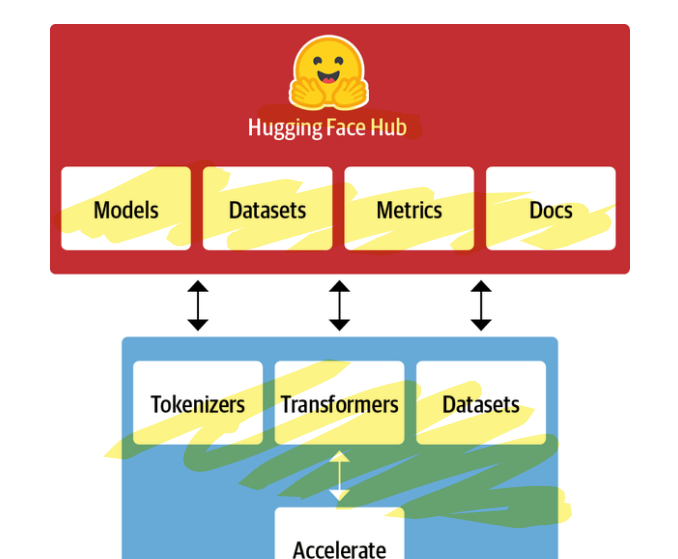

## The Hugging Face Hub

The Hugging Face Hub hosts over 20,000 freely available models. 
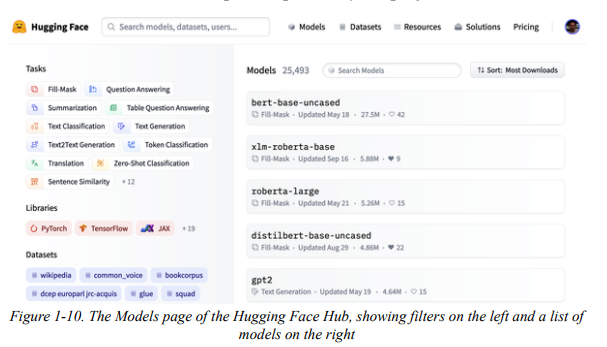

* The Hub also provides model and dataset cards to document the contents of
models and datasets and help you make an informed decision about whether
they’re the right ones for you. One of the coolest features of the Hub is that
you can try out any model directly through the various task-specific
interactive widgets

## Hugging Face Tokenizer
* Tokenizers provides many tokenization strategies and is extremely fast at
tokenizing text.
* With Tokenizers, we can load a
tokenizer in the same way we can load pretrained model weights with 
Transformers.


## Hugging Face Datasets

* Datasets simplifies this process by providing a standard interface for
thousands of datasets that can be found on the Hub. 

* It also provides smart
caching (so you don’t have to redo your preprocessing each time you run
your code) and avoids RAM limitations by leveraging a special mechanism
called **memory mapping that stores the contents of a file in virtual memory**
and **enables multiple processes** to modify a file more efficiently.

* The library
is also interoperable with popular frameworks like Pandas and NumPy

## Main Challenges with Transformers

* **Language** : NLP research is dominated by the English language. There are several
models for other languages, but it is harder to find pretrained models for
rare or low-resource languages. 

* **Data availability** : Although we can use transfer learning to dramatically reduce the
amount of labeled training data our models need, it is still a lot
compared to how much a human needs to perform the task

* **Working with long documents** :
Self-attention works extremely well on paragraph-long texts, but it
becomes very expensive when we move to longer texts like whole
documents.

* **Opacity**
As with other deep learning models, transformers are to a large extent
opaque

* **Bias**
Transformer models are predominantly pretrained on text data from the
internet. This imprints all the biases that are present in the data into the
models.